<a href="https://colab.research.google.com/github/Valerie-Perea/data_science_projects_vp/blob/main/VP_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [257]:
import sqlite3 as db
import pandas as pd


In [258]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3


In [259]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [260]:
!rm -f chinook.db

In [261]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [262]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Apr  4 17:21 .
drwxr-xr-x 1 root root   4096 Apr  4 13:04 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Apr  4 13:20 chinook.zip
drwxr-xr-x 4 root root   4096 Apr  2 13:35 .config
drwxr-xr-x 1 root root   4096 Apr  2 13:35 sample_data
-rw-r--r-- 1 root root      0 Apr  4 14:16 your_database.db


In [263]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")


In [264]:
# Select the first 10 entries from the employees table
query = '''
  select *
  from employees
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [265]:
employees.shape

(8, 15)

In [266]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeId  8 non-null      int64  
 1   LastName    8 non-null      object 
 2   FirstName   8 non-null      object 
 3   Title       8 non-null      object 
 4   ReportsTo   7 non-null      float64
 5   BirthDate   8 non-null      object 
 6   HireDate    8 non-null      object 
 7   Address     8 non-null      object 
 8   City        8 non-null      object 
 9   State       8 non-null      object 
 10  Country     8 non-null      object 
 11  PostalCode  8 non-null      object 
 12  Phone       8 non-null      object 
 13  Fax         8 non-null      object 
 14  Email       8 non-null      object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ KB


In [267]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [268]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [269]:
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get all tables and views
cursor.execute("SELECT name, type FROM sqlite_master WHERE type IN ('table', 'view');")
tables = cursor.fetchall()

# Display the list of tables and views
for table in tables:
    print(table)

# Close the connection
conn.close()

('albums', 'table')
('sqlite_sequence', 'table')
('artists', 'table')
('customers', 'table')
('employees', 'table')
('genres', 'table')
('invoices', 'table')
('invoice_items', 'table')
('media_types', 'table')
('playlists', 'table')
('playlist_track', 'table')
('tracks', 'table')
('sqlite_stat1', 'table')


In [270]:
# Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db
select *
from employees
limit 10

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [271]:
# Count the number of unique albums
%%script sqlite3 --column --header chinook.db
select count(distinct AlbumID)
from tracks

count(distinct AlbumID)
-----------------------
347                    


In [272]:
# Select the first 10 entries from the albums table
%%script sqlite3 --column --header chinook.db
select *
from albums
limit 10


AlbumId  Title                                  ArtistId
-------  -------------------------------------  --------
1        For Those About To Rock We Salute You  1       
2        Balls to the Wall                      2       
3        Restless and Wild                      2       
4        Let There Be Rock                      1       
5        Big Ones                               3       
6        Jagged Little Pill                     4       
7        Facelift                               5       
8        Warner 25 Anos                         6       
9        Plays Metallica By Four Cellos         7       
10       Audioslave                             8       


In [273]:
# Select the first 10 entries from the artists table
%%script sqlite3 --column --header chinook.db
select *
from artists
limit 10

ArtistId  Name                
--------  --------------------
1         AC/DC               
2         Accept              
3         Aerosmith           
4         Alanis Morissette   
5         Alice In Chains     
6         Antônio Carlos Jobim
7         Apocalyptica        
8         Audioslave          
9         BackBeat            
10        Billy Cobham        


In [274]:
# Select employees and their bosses
%%script sqlite3 --column --header chinook.db
select emp1.EmployeeId, emp1.LastName, emp1.FirstName, emp1.Title, emp1.ReportsTo, emp2.ReportsTo, emp2.EmployeeId, emp2.LastName, emp2.FirstName
from employees as emp1
join employees as emp2
on emp1.ReportsTo = emp2.EmployeeID

EmployeeId  LastName  FirstName  Title                ReportsTo  ReportsTo  EmployeeId  LastName  FirstName
----------  --------  ---------  -------------------  ---------  ---------  ----------  --------  ---------
2           Edwards   Nancy      Sales Manager        1                     1           Adams     Andrew   
3           Peacock   Jane       Sales Support Agent  2          1          2           Edwards   Nancy    
4           Park      Margaret   Sales Support Agent  2          1          2           Edwards   Nancy    
5           Johnson   Steve      Sales Support Agent  2          1          2           Edwards   Nancy    
6           Mitchell  Michael    IT Manager           1                     1           Adams     Andrew   
7           King      Robert     IT Staff             6          1          6           Mitchell  Michael  
8           Callahan  Laura      IT Staff             6          1          6           Mitchell  Michael  


In [275]:
# The first three entries from a self cross join of employees
%%script sqlite3 --column --header chinook.db
select *
from employees as emp1
join employees as emp2
limit 3

EmployeeId  LastName  FirstName  Title            ReportsTo  BirthDate            HireDate             Address              City      State  Country  PostalCode  Phone              Fax                Email                   EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address              City      State  Country  PostalCode  Phone              Fax                Email                 
----------  --------  ---------  ---------------  ---------  -------------------  -------------------  -------------------  --------  -----  -------  ----------  -----------------  -----------------  ----------------------  ----------  --------  ---------  -------------------  ---------  -------------------  -------------------  -------------------  --------  -----  -------  ----------  -----------------  -----------------  ----------------------
1           Adams     Andrew     General Manager             1962-02-18 00:00:00  2002-08-14 00:00

In [276]:
# Select the first 10 entries from joining the artists and albums tables
%%script sqlite3 --column --header chinook.db
select *
from artists
join albums
on artists.ArtistID = albums.ArtistID
limit 10

ArtistId  Name                  AlbumId  Title                                  ArtistId
--------  --------------------  -------  -------------------------------------  --------
1         AC/DC                 1        For Those About To Rock We Salute You  1       
2         Accept                2        Balls to the Wall                      2       
2         Accept                3        Restless and Wild                      2       
1         AC/DC                 4        Let There Be Rock                      1       
3         Aerosmith             5        Big Ones                               3       
4         Alanis Morissette     6        Jagged Little Pill                     4       
5         Alice In Chains       7        Facelift                               5       
6         Antônio Carlos Jobim  8        Warner 25 Anos                         6       
7         Apocalyptica          9        Plays Metallica By Four Cellos         7       
8         Audioslave 

In [277]:
# Select a few columns from a self cross joins of employees
%%script sqlite3 --column --header chinook.db
select emp1.EmployeeID, emp1.FirstName, emp1.ReportsTo, emp2.EmployeeID, emp2.FirstName
from employees as emp1
join employees as emp2

EmployeeId  FirstName  ReportsTo  EmployeeId  FirstName
----------  ---------  ---------  ----------  ---------
1           Andrew                1           Andrew   
1           Andrew                2           Nancy    
1           Andrew                3           Jane     
1           Andrew                4           Margaret 
1           Andrew                5           Steve    
1           Andrew                6           Michael  
1           Andrew                7           Robert   
1           Andrew                8           Laura    
2           Nancy      1          1           Andrew   
2           Nancy      1          2           Nancy    
2           Nancy      1          3           Jane     
2           Nancy      1          4           Margaret 
2           Nancy      1          5           Steve    
2           Nancy      1          6           Michael  
2           Nancy      1          7           Robert   
2           Nancy      1          8           La

In [278]:
# Connect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# List of tables to query
tables = ['albums', 'artists', 'customers', 'employees', 'invoices', 'invoice_items', 'media_types', 'tracks']

# Loop through each table to count records
for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {table};")
    count = cursor.fetchone()[0]
    print(f"Table {table} has {count} records.")

# Close the connection
conn.close()

Table albums has 347 records.
Table artists has 275 records.
Table customers has 59 records.
Table employees has 8 records.
Table invoices has 412 records.
Table invoice_items has 2240 records.
Table media_types has 5 records.
Table tracks has 3503 records.


In [279]:
# Select the first 10 entries from a self cross joins of employees
%%script sqlite3 --column --header chinook.db
select emp1.EmployeeID, emp1.FirstName, emp1.ReportsTo, emp2.EmployeeID, emp2.FirstName
from employees as emp1
join employees as emp2
limit 10

EmployeeId  FirstName  ReportsTo  EmployeeId  FirstName
----------  ---------  ---------  ----------  ---------
1           Andrew                1           Andrew   
1           Andrew                2           Nancy    
1           Andrew                3           Jane     
1           Andrew                4           Margaret 
1           Andrew                5           Steve    
1           Andrew                6           Michael  
1           Andrew                7           Robert   
1           Andrew                8           Laura    
2           Nancy      1          1           Andrew   
2           Nancy      1          2           Nancy    


does .cursor require me to close connection each time?

In [280]:
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to find the top 5 selling tracks by revenue
cursor.execute('''
    SELECT t.Name, SUM(ii.Quantity * ii.UnitPrice) AS Revenue
    FROM tracks t
    JOIN invoice_items ii ON t.TrackId = ii.TrackId
    GROUP BY t.Name
    ORDER BY Revenue DESC
    LIMIT 5;
''')
top_tracks = cursor.fetchall()

# Display results
for track in top_tracks:
    print(f"Track: {track[0]}, Revenue: ${track[1]:.2f}")

conn.close()

Track: The Trooper, Revenue: $4.95
Track: Walkabout, Revenue: $3.98
Track: The Woman King, Revenue: $3.98
Track: The Fix, Revenue: $3.98
Track: Pilot, Revenue: $3.98


In [281]:
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get total spending by each customer
cursor.execute('''
    SELECT c.FirstName || ' ' || c.LastName AS Customer, SUM(i.Total) AS TotalSpending
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId
    ORDER BY TotalSpending DESC
    LIMIT 5;
''')
top_customers = cursor.fetchall()

# Display results
for customer in top_customers:
    print(f"Customer: {customer[0]}, Total Spending: ${customer[1]:.2f}")

conn.close()


Customer: Helena Holý, Total Spending: $49.62
Customer: Richard Cunningham, Total Spending: $47.62
Customer: Luis Rojas, Total Spending: $46.62
Customer: Ladislav Kovács, Total Spending: $45.62
Customer: Hugh O'Reilly, Total Spending: $45.62


In [282]:
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to count the number of tracks per genre
cursor.execute('''
    SELECT g.Name AS Genre, COUNT(t.TrackId) AS TrackCount
    FROM genres g
    JOIN tracks t ON g.GenreId = t.GenreId
    GROUP BY g.GenreId
    ORDER BY TrackCount DESC
    LIMIT 5;
''')
top_genres = cursor.fetchall()

# Display results
for genre in top_genres:
    print(f"Genre: {genre[0]}, Track Count: {genre[1]}")

# Close the connection
conn.close()

Genre: Rock, Track Count: 1297
Genre: Latin, Track Count: 579
Genre: Metal, Track Count: 374
Genre: Alternative & Punk, Track Count: 332
Genre: Jazz, Track Count: 130


In [283]:
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Correct query to get total sales by employee
cursor.execute('''
    SELECT e.FirstName || ' ' || e.LastName AS Employee, SUM(i.Total) AS TotalSales
    FROM employees e
    JOIN invoices i ON e.EmployeeId = EmployeeId  -- Corrected to EmployeeId
    GROUP BY e.EmployeeId
    ORDER BY TotalSales DESC
    LIMIT 5;
''')
employee_sales = cursor.fetchall()

# Display results
for employee in employee_sales:
    print(f"Employee: {employee[0]}, Total Sales: ${employee[1]:.2f}")

# Close the connection
conn.close()


Employee: Andrew Adams, Total Sales: $2328.60
Employee: Nancy Edwards, Total Sales: $2328.60
Employee: Jane Peacock, Total Sales: $2328.60
Employee: Margaret Park, Total Sales: $2328.60
Employee: Steve Johnson, Total Sales: $2328.60


In [284]:
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get track popularity by genre and media type
cursor.execute('''
    SELECT g.Name AS Genre, mt.Name AS MediaType, COUNT(t.TrackId) AS TrackCount
    FROM genres g
    JOIN tracks t ON g.GenreId = t.GenreId
    JOIN media_types mt ON t.MediaTypeId = mt.MediaTypeId
    GROUP BY g.GenreId, mt.MediaTypeId
    ORDER BY TrackCount DESC;
''')
genre_media_popularity = cursor.fetchall()

# Display results
for record in genre_media_popularity:
    print(f"Genre: {record[0]}, Media Type: {record[1]}, Track Count: {record[2]}")

# Close the connection
conn.close()

Genre: Rock, Media Type: MPEG audio file, Track Count: 1211
Genre: Latin, Media Type: MPEG audio file, Track Count: 578
Genre: Metal, Media Type: MPEG audio file, Track Count: 374
Genre: Alternative & Punk, Media Type: MPEG audio file, Track Count: 332
Genre: Jazz, Media Type: MPEG audio file, Track Count: 127
Genre: TV Shows, Media Type: Protected MPEG-4 video file, Track Count: 93
Genre: Rock, Media Type: Protected AAC audio file, Track Count: 84
Genre: Blues, Media Type: MPEG audio file, Track Count: 81
Genre: Classical, Media Type: Protected AAC audio file, Track Count: 67
Genre: Drama, Media Type: Protected MPEG-4 video file, Track Count: 64
Genre: Reggae, Media Type: MPEG audio file, Track Count: 58
Genre: R&B/Soul, Media Type: MPEG audio file, Track Count: 49
Genre: Soundtrack, Media Type: MPEG audio file, Track Count: 42
Genre: Alternative, Media Type: Protected AAC audio file, Track Count: 38
Genre: Hip Hop/Rap, Media Type: MPEG audio file, Track Count: 35
Genre: Pop, Media Ty

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


#### SELECT (with * and with column names)


In [285]:
# Select customers, their rep, and the rep's supervisor
## uses CTEs
%%script sqlite3 --column --header chinook.db

with
emp as (
  select EmployeeID, FirstName, Lastname, ReportsTo, Title
  from employees
),
reps as (
  select EmployeeID, FirstName, Lastname, ReportsTo
  from emp
  where Title = "Sales Support Agent"
),
supervisors as (
  select EmployeeID, FirstName, Lastname
  from emp
  where Title != "Sales Support Agent"

),
workers as (
  select r.EmployeeID as "EmpID", r.Firstname as "Rep", r.ReportsTo as "ReportID", s.EmployeeID as "SuperID", s.FirstName as "Supervisor"
  from reps as r
  join supervisors as s
  where r.ReportsTo = s.EmployeeID
),
cust as (
  select CustomerID, FirstName as "Customer", SupportRepID
  from customers
),
cust_rep_super as (
  select Customer, Rep, Supervisor
  from cust
  join workers
  where SupportRepID = EmpID
)

SELECT *
FROM cust_rep_super
limit 10

Customer  Rep   Supervisor
--------  ----  ----------
Luís      Jane  Nancy     
François  Jane  Nancy     
Roberto   Jane  Nancy     
Jennifer  Jane  Nancy     
Michelle  Jane  Nancy     
Tim       Jane  Nancy     
Frank     Jane  Nancy     
Robert    Jane  Nancy     
Edward    Jane  Nancy     
Ellie     Jane  Nancy     


#### WHERE


#### AND


#### OR


#### LIKE (with % or _ wildcard)


In [286]:
%%script sqlite3 --column --header chinook.db

WITH
  -- vals       as ( select unitprice as value                        from Invoice_items ),
    vals       as ( select Total as value                        from Invoices ),

  -- calculate descriptive statistics
  count_mean as ( select count(1) as n, max(value) as max, min(value) as min, AVG(value) as mean     from vals ),
  delta      as ( select value, n, mean, value - mean as delta from vals, count_mean ),
  delta2     as ( select power(delta, 2) as delta2             from delta ),
  delta2sum  as ( select sum(delta2) as delta2sum              from delta2 ),
  variance   as ( select delta2sum/(n-1) as variance           from delta2sum, count_mean ),
  stdev      as ( select power(variance, 0.5) as stdev         from variance ),
  desc_stats as ( select *                                     from count_mean, stdev, delta2sum, variance )

SELECT
  *
FROM
  desc_stats
;


n    max    min   mean              stdev            delta2sum         variance        
---  -----  ----  ----------------  ---------------  ----------------  ----------------
412  25.86  0.99  5.65194174757282  4.7453196935681  9254.92224660193  22.5180589941653


#### BETWEEN


#### LIMIT



### Sorting and Grouping


#### ORDER BY


#### DISTINCT


#### GROUP BY



### Aggregates


#### MAX


#### MIN


#### SUM


#### AVG


#### COUNT



## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [287]:
pip install matplotlib seaborn pandas


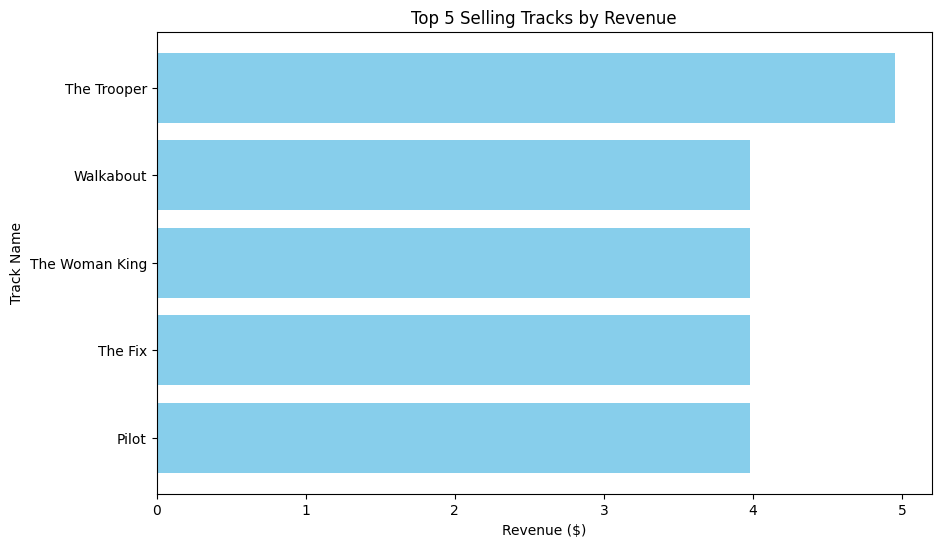

In [288]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

# Connect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get the top 5 selling tracks by revenue
cursor.execute('''
    SELECT t.Name, SUM(ii.Quantity * ii.UnitPrice) AS Revenue
    FROM tracks t
    JOIN invoice_items ii ON t.TrackId = ii.TrackId
    GROUP BY t.Name
    ORDER BY Revenue DESC
    LIMIT 5;
''')
top_tracks = cursor.fetchall()

# Convert to a pandas DataFrame for easy plotting
df_tracks = pd.DataFrame(top_tracks, columns=['Track', 'Revenue'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_tracks['Track'], df_tracks['Revenue'], color='skyblue')
plt.xlabel('Revenue ($)')
plt.ylabel('Track Name')
plt.title('Top 5 Selling Tracks by Revenue')
plt.gca().invert_yaxis()  # To display the top-selling track at the top
plt.show()

# Close the connection
conn.close()

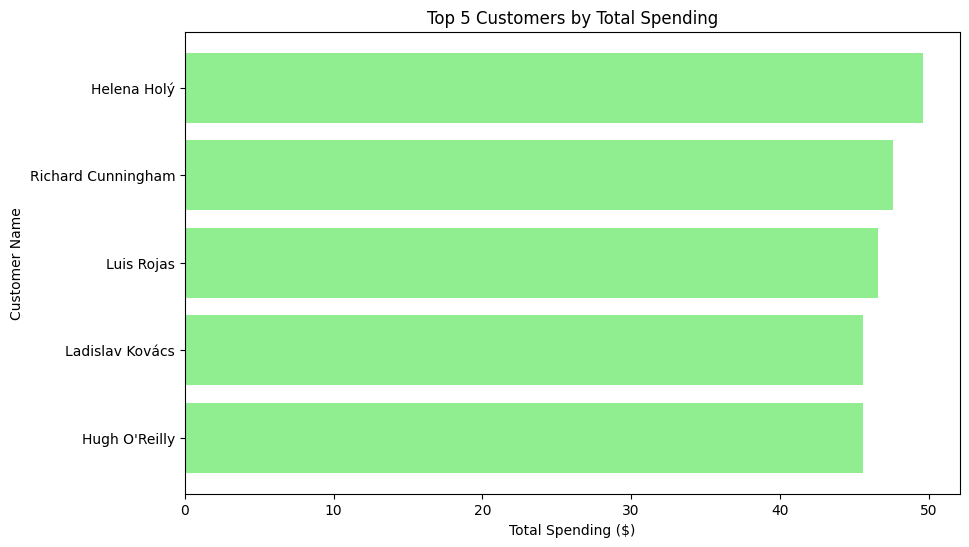

In [289]:
# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get total spending by each customer
cursor.execute('''
    SELECT c.FirstName || ' ' || c.LastName AS Customer, SUM(i.Total) AS TotalSpending
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId
    ORDER BY TotalSpending DESC
    LIMIT 5;
''')
top_customers = cursor.fetchall()

# Convert to a pandas DataFrame for easy plotting
df_customers = pd.DataFrame(top_customers, columns=['Customer', 'TotalSpending'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_customers['Customer'], df_customers['TotalSpending'], color='lightgreen')
plt.xlabel('Total Spending ($)')
plt.ylabel('Customer Name')
plt.title('Top 5 Customers by Total Spending')
plt.gca().invert_yaxis()  # To display the top spender at the top
plt.show()

# Close the connection
conn.close()


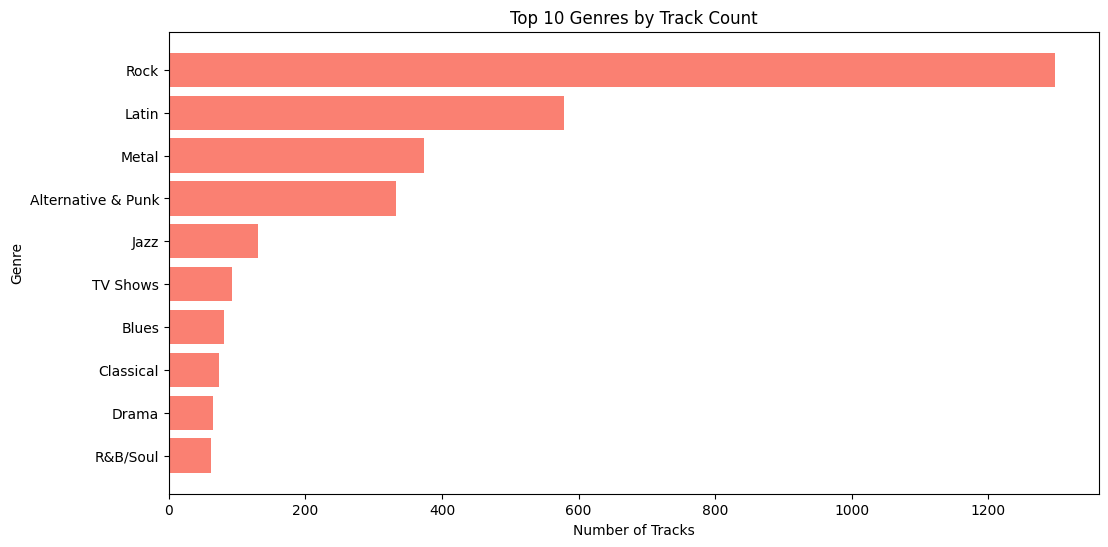

In [290]:
# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to count the number of tracks per genre
cursor.execute('''
    SELECT g.Name AS Genre, COUNT(t.TrackId) AS TrackCount
    FROM genres g
    JOIN tracks t ON g.GenreId = t.GenreId
    GROUP BY g.GenreId
    ORDER BY TrackCount DESC
    LIMIT 10;
''')
top_genres = cursor.fetchall()

# Convert to a pandas DataFrame for easy plotting
df_genres = pd.DataFrame(top_genres, columns=['Genre', 'TrackCount'])

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(df_genres['Genre'], df_genres['TrackCount'], color='salmon')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Track Count')
plt.gca().invert_yaxis()  # To display the most popular genre at the top
plt.show()

# Close the connection
conn.close()


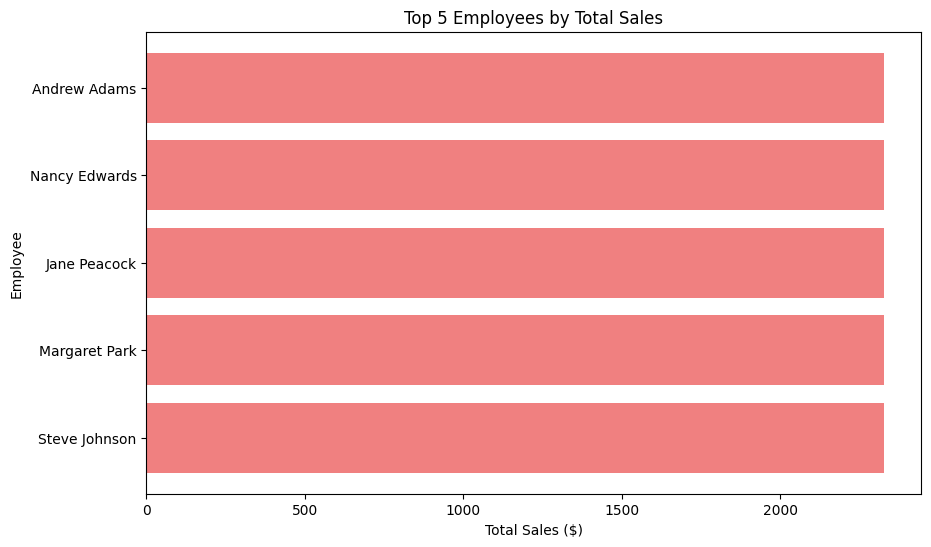

In [291]:
# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get total sales by employee
cursor.execute('''
    SELECT e.FirstName || ' ' || e.LastName AS Employee, SUM(i.Total) AS TotalSales
    FROM employees e
    JOIN invoices i ON e.EmployeeId = EmployeeId
    GROUP BY e.EmployeeId
    ORDER BY TotalSales DESC
    LIMIT 5;
''')
employee_sales = cursor.fetchall()

# Convert to a pandas DataFrame for easy plotting
df_employee_sales = pd.DataFrame(employee_sales, columns=['Employee', 'TotalSales'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_employee_sales['Employee'], df_employee_sales['TotalSales'], color='lightcoral')
plt.xlabel('Total Sales ($)')
plt.ylabel('Employee')
plt.title('Top 5 Employees by Total Sales')
plt.gca().invert_yaxis()  # To display the highest salesperson at the top
plt.show()

# Close the connection
conn.close()


In [292]:
import sqlite3
import pandas as pd

# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get total sales by employee with invoice-level details
cursor.execute('''
    SELECT e.FirstName || ' ' || e.LastName AS Employee, i.InvoiceId, i.Total
    FROM employees e
    JOIN invoices i ON e.EmployeeID = EmployeeID
    ORDER BY e.EmployeeID;
''')

# Fetch the data
sales_details = cursor.fetchall()

# Convert to a pandas DataFrame to check the data
df_sales_details = pd.DataFrame(sales_details, columns=['Employee', 'InvoiceId', 'InvoiceTotal'])

# Check the first few rows to see the data
print(df_sales_details.head())

# Close the connection
conn.close()


       Employee  InvoiceId  InvoiceTotal
0  Andrew Adams          1          1.98
1  Andrew Adams          2          3.96
2  Andrew Adams          3          5.94
3  Andrew Adams          4          8.91
4  Andrew Adams          5         13.86


        Employee  TotalSales
0   Andrew Adams      2328.6
1  Nancy Edwards      2328.6
2   Jane Peacock      2328.6
3  Margaret Park      2328.6
4  Steve Johnson      2328.6


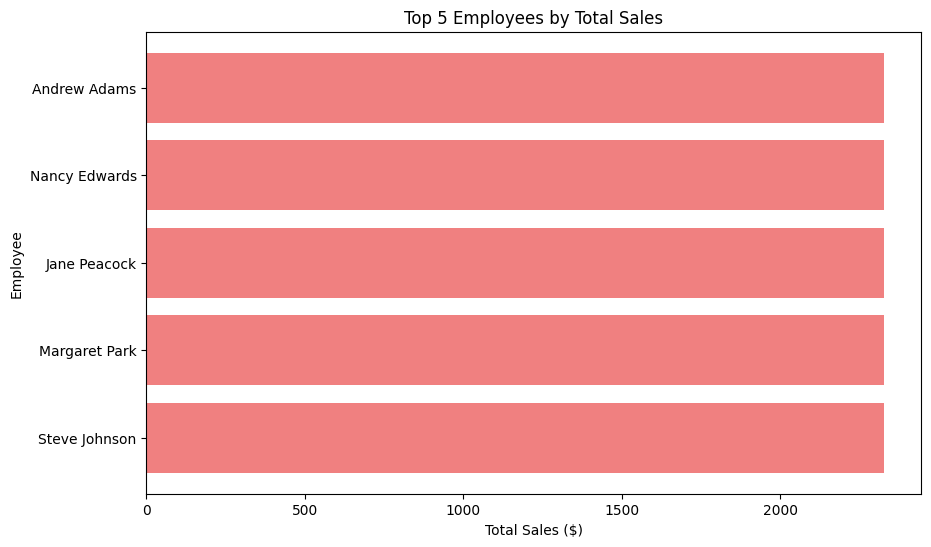

In [293]:
# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get total sales by employee
cursor.execute('''
    SELECT e.FirstName || ' ' || e.LastName AS Employee, SUM(i.Total) AS TotalSales
    FROM employees e
    JOIN invoices i ON e.EmployeeID = EmployeeID
    GROUP BY e.EmployeeID
    ORDER BY TotalSales DESC
    LIMIT 5;
''')

# Fetch the results
employee_sales = cursor.fetchall()

# Convert to a pandas DataFrame for easy plotting
df_employee_sales = pd.DataFrame(employee_sales, columns=['Employee', 'TotalSales'])

# Check the DataFrame to see if the totals are correct
print(df_employee_sales)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(df_employee_sales['Employee'], df_employee_sales['TotalSales'], color='lightcoral')
plt.xlabel('Total Sales ($)')
plt.ylabel('Employee')
plt.title('Top 5 Employees by Total Sales')
plt.gca().invert_yaxis()  # To display the highest salesperson at the top
plt.show()

# Close the connection
conn.close()


In [294]:
import sqlite3

# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get total sales by employee
cursor.execute('''
    SELECT
        e.FirstName || ' ' || e.LastName AS sales_rep,
        e.BirthDate AS birth_date,
        e.HireDate AS hire_date,
        e.City AS work_location,
        ROUND(SUM(i.Total), 2) AS total_sales
    FROM invoices i  -- Correct table name 'invoices'
    INNER JOIN customers c ON c.CustomerId = i.CustomerId  -- Correct table name 'customers'
    INNER JOIN employees e ON e.EmployeeId = c.SupportRepId  -- Correct table name 'employees'
    GROUP BY sales_rep
    ORDER BY total_sales DESC;
''')

# Fetch the results
employee_sales = cursor.fetchall()

# Convert to a pandas DataFrame for easy inspection
import pandas as pd
df_employee_sales = pd.DataFrame(employee_sales, columns=['Sales Rep', 'Birth Date', 'Hire Date', 'Work Location', 'Total Sales'])

# Display the data for inspection
print(df_employee_sales)

# Close the connection
conn.close()



       Sales Rep           Birth Date            Hire Date Work Location  \
0   Jane Peacock  1973-08-29 00:00:00  2002-04-01 00:00:00       Calgary   
1  Margaret Park  1947-09-19 00:00:00  2003-05-03 00:00:00       Calgary   
2  Steve Johnson  1965-03-03 00:00:00  2003-10-17 00:00:00       Calgary   

   Total Sales  
0       833.04  
1       775.40  
2       720.16  


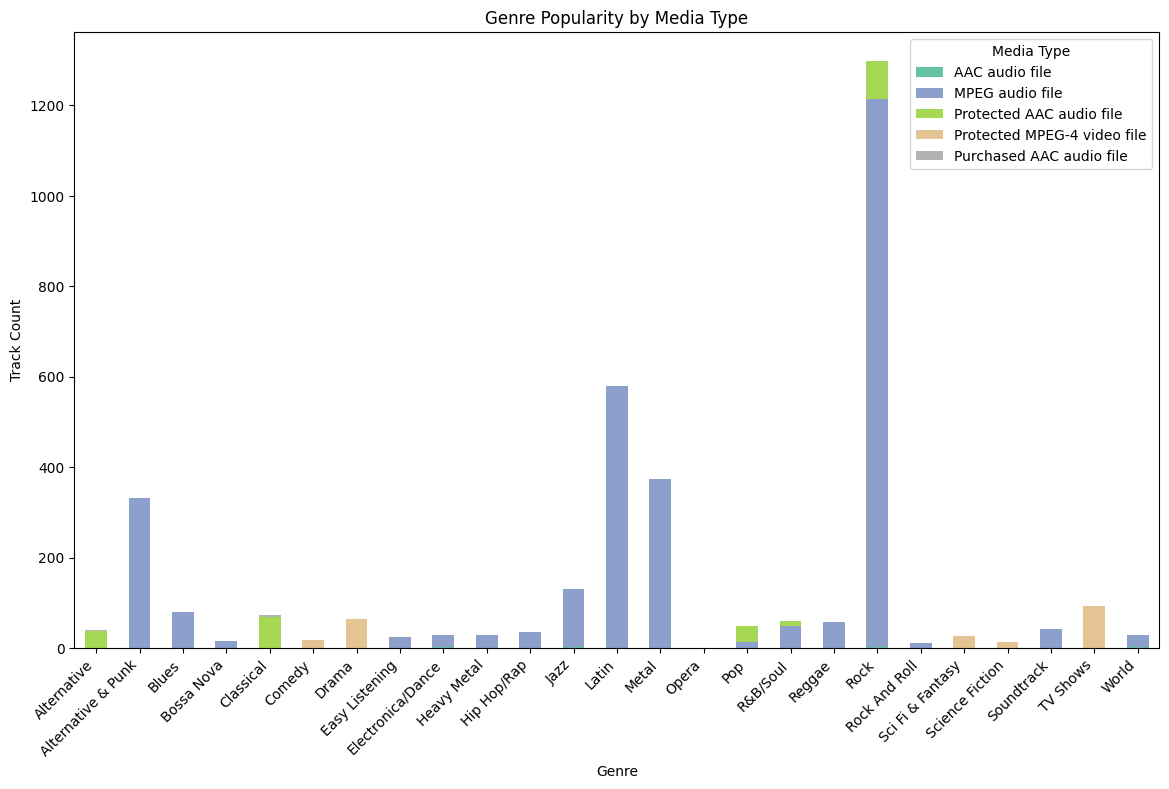

In [295]:
# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get genre popularity by media type
cursor.execute('''
    SELECT g.Name AS Genre, mt.Name AS MediaType, COUNT(t.TrackId) AS TrackCount
    FROM genres g
    JOIN tracks t ON g.GenreId = t.GenreId
    JOIN media_types mt ON t.MediaTypeId = mt.MediaTypeId
    GROUP BY g.GenreId, mt.MediaTypeId
    ORDER BY TrackCount DESC;
''')
genre_media_popularity = cursor.fetchall()

# Convert to pandas DataFrame
df_genre_media = pd.DataFrame(genre_media_popularity, columns=['Genre', 'MediaType', 'TrackCount'])

# Pivot the DataFrame to create a suitable format for stacked bar chart
df_pivot = df_genre_media.pivot(index='Genre', columns='MediaType', values='TrackCount').fillna(0)

# Plotting
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Genre Popularity by Media Type')
plt.xlabel('Genre')
plt.ylabel('Track Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Media Type')
plt.show()

# Close the connection
conn.close()


## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [296]:
import sqlite3 as db

# Connect to the database (replace with your actual database)
conn = sqlite3.connect('your_database.db')
cursor = conn.cursor()

# Use a CTE to calculate total spending by each customer
try:
    cursor.execute('''
        WITH TotalSpending AS (
            SELECT c.CustomerId, c.FirstName || ' ' || c.LastName AS Customer, SUM(i.Total) AS TotalSpent
            FROM customers c
            JOIN invoices i ON c.CustomerId = i.CustomerId
            GROUP BY c.CustomerId
        )
        SELECT * FROM TotalSpending;
    ''')

    # Fetch and print results
    rows = cursor.fetchall()
    for row in rows:
        print(row)

except Exception as e:
    print("An error occurred:", e)

finally:
    # Close the connection after you're done
    conn.close()


An error occurred: no such table: customers


In [297]:
# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get total sales by employee, customer, and sales employee
cursor.execute('''
    SELECT e.FirstName || ' ' || e.LastName AS Employee, c.FirstName || ' ' || c.LastName AS Customer,
           SUM(i.Total) AS TotalSales
    FROM invoices i
    JOIN customers c ON i.CustomerId = c.CustomerId
    JOIN employees e ON EmployeeId = e.EmployeeId
    GROUP BY e.EmployeeId, c.CustomerId
    ORDER BY TotalSales DESC
    LIMIT 10;
''')
sales_data = cursor.fetchall()

# Display results
for record in sales_data:
    print(f"Employee: {record[0]}, Customer: {record[1]}, Total Sales: ${record[2]:.2f}")

# Close the connection
conn.close()


Employee: Andrew Adams, Customer: Helena Holý, Total Sales: $49.62
Employee: Nancy Edwards, Customer: Helena Holý, Total Sales: $49.62
Employee: Jane Peacock, Customer: Helena Holý, Total Sales: $49.62
Employee: Margaret Park, Customer: Helena Holý, Total Sales: $49.62
Employee: Steve Johnson, Customer: Helena Holý, Total Sales: $49.62
Employee: Michael Mitchell, Customer: Helena Holý, Total Sales: $49.62
Employee: Robert King, Customer: Helena Holý, Total Sales: $49.62
Employee: Laura Callahan, Customer: Helena Holý, Total Sales: $49.62
Employee: Andrew Adams, Customer: Richard Cunningham, Total Sales: $47.62
Employee: Nancy Edwards, Customer: Richard Cunningham, Total Sales: $47.62


In [298]:
pip install scikit-learn pandas matplotlib


Mean Squared Error: 4228.02063642092


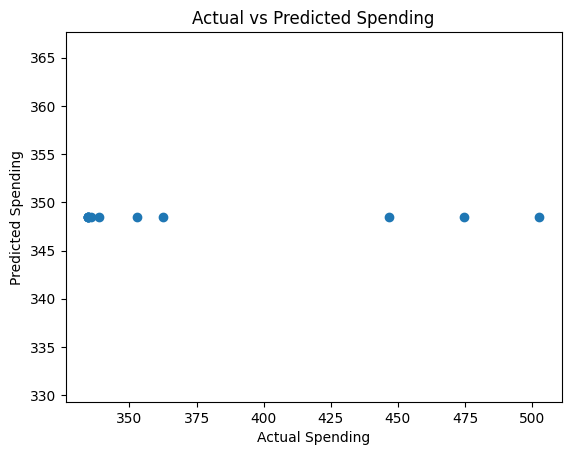

In [299]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to get customer spending data
cursor.execute('''
    SELECT c.CustomerId, COUNT(i.InvoiceId) AS InvoiceCount, SUM(ii.Quantity) AS TotalItems, SUM(i.Total) AS TotalSpending
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
    GROUP BY c.CustomerId;
''')

# Fetch data into a pandas DataFrame
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['CustomerId', 'InvoiceCount', 'TotalItems', 'TotalSpending'])

# Close the connection
conn.close()

# Split the data into features (X) and target (y)
X = df[['InvoiceCount', 'TotalItems']]  # Features
y = df['TotalSpending']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Spending")
plt.ylabel("Predicted Spending")
plt.title("Actual vs Predicted Spending")
plt.show()


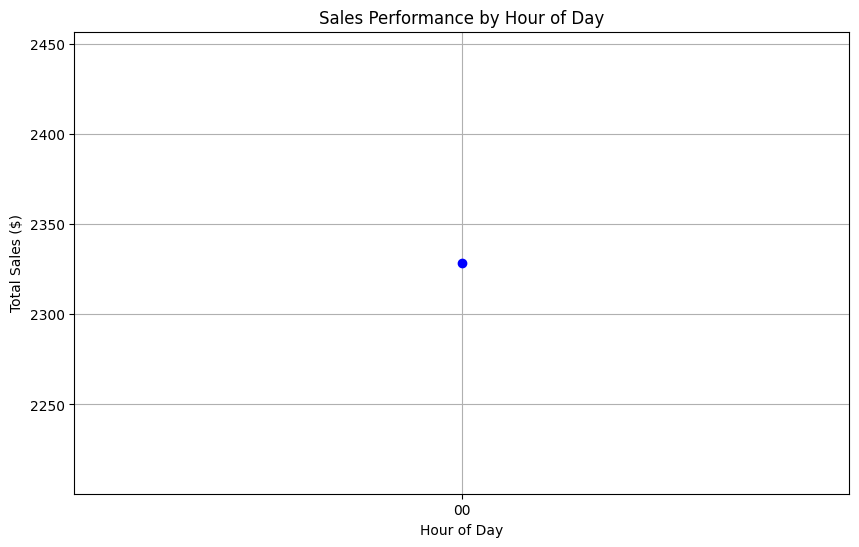

In [300]:
# Reconnect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to extract hour from invoice date and total sales per hour
cursor.execute('''
    SELECT strftime('%H', i.InvoiceDate) AS Hour, SUM(i.Total) AS Sales
    FROM invoices i
    GROUP BY Hour
    ORDER BY Hour;
''')
sales_by_hour = cursor.fetchall()

# Convert to pandas DataFrame
df_sales_hour = pd.DataFrame(sales_by_hour, columns=['Hour', 'Sales'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_sales_hour['Hour'], df_sales_hour['Sales'], marker='o', color='b', linestyle='-', markersize=6)
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.title('Sales Performance by Hour of Day')
plt.grid(True)
plt.show()

# Close the connection
conn.close()
